In [ ]:
from ase.io import read, write
from pathlib import Path
from pymatgen.ext.matproj import MPRester

# Replace with your Materials Project API key
API_KEY = "wCN1U16O5jIs0byffczBICP2D7S79HYq"

# Replace with the material ID you are interested in
material_id = "mp-134"  # Example: Silicon has the material ID "mp-149"

with MPRester(API_KEY) as m:
    # Get CIF file
    structure = m.get_structure_by_material_id(material_id, conventional_unit_cell=True)
    cif_str = structure.to(fmt="cif")

    # Save the CIF file to the local directory
    with open(f"{material_id}.cif", "w") as f:
        f.write(cif_str)

print(f"CIF file for {material_id} has been saved.")

cs_dir = './'
cs_cif = Path(cs_dir, 'mp-134.cif')
cs_atoms = read(cs_cif, format='cif')
cs_stru = Path(cs_dir, 'STRU')
pp = {'Al':'Al_ONCV_PBE-1.0.upf'}
basis = {'Al':'Al_gga_9au_100Ry_4s4p1d.orb'}

In [ ]:
import numpy as np
from scipy.optimize import curve_fit

# Define the third-order Birch-Murnaghan equation of state
def birch_murnaghan(V, E0, V0, B0, B0_prime):
    eta = (V0 / V) ** (2/3)
    term1 = eta - 1
    term2 = (6 - 4 * eta)
    return E0 + (9 * V0 * B0 / 16) * (B0_prime * term1**3 + term2 * term1**2)

# Volume and energy data points
V_data = np.array([9.941905317341837 , 10.770397427120322, 11.598889536898808, 12.427381646677295, 13.255873756455783, 14.084365866234268, 14.912857976012754, 15.74135008579124 , 16.569842195569727, 17.398334305348214, 18.226826415126702, 19.055318524905186, 19.883810634683677, 20.712302744462157, 21.540794854240644, 22.369286964019132])
E_data = np.array([-1881.6262759, -1882.1471493, -1882.5189086, -1882.780818 , -1882.9600157, -1883.0731824, -1883.1438685, -1883.1800563, -1883.1919313, -1883.1825921, -1883.1576552, -1883.1253609, -1883.081299 , -1883.031233 , -1882.9767464, -1882.9191834])
# Initial guess for parameters
E0_guess = -1883.0
V0_guess = 15.0
B0_guess = 1.0
B0_prime_guess = 1.0
initial_guess = [E0_guess, V0_guess, B0_guess, B0_prime_guess]  # Replace with initial guesses

# Fitting
popt, pcov = curve_fit(birch_murnaghan, V_data, E_data, p0=initial_guess)

# Get the fitting parameters
E0_fit, V0_fit, B0_fit, B0_prime_fit = popt

print(f"Fitted parameters: E0 = {E0_fit}, V0 = {V0_fit}, B0 = {B0_fit}, B0' = {B0_prime_fit}")


Fitted parameters: E0 = -1883.1917036213313, V0 = 16.594943017933204, B0 = 0.4676512662928327, B0' = 4.409800179798176


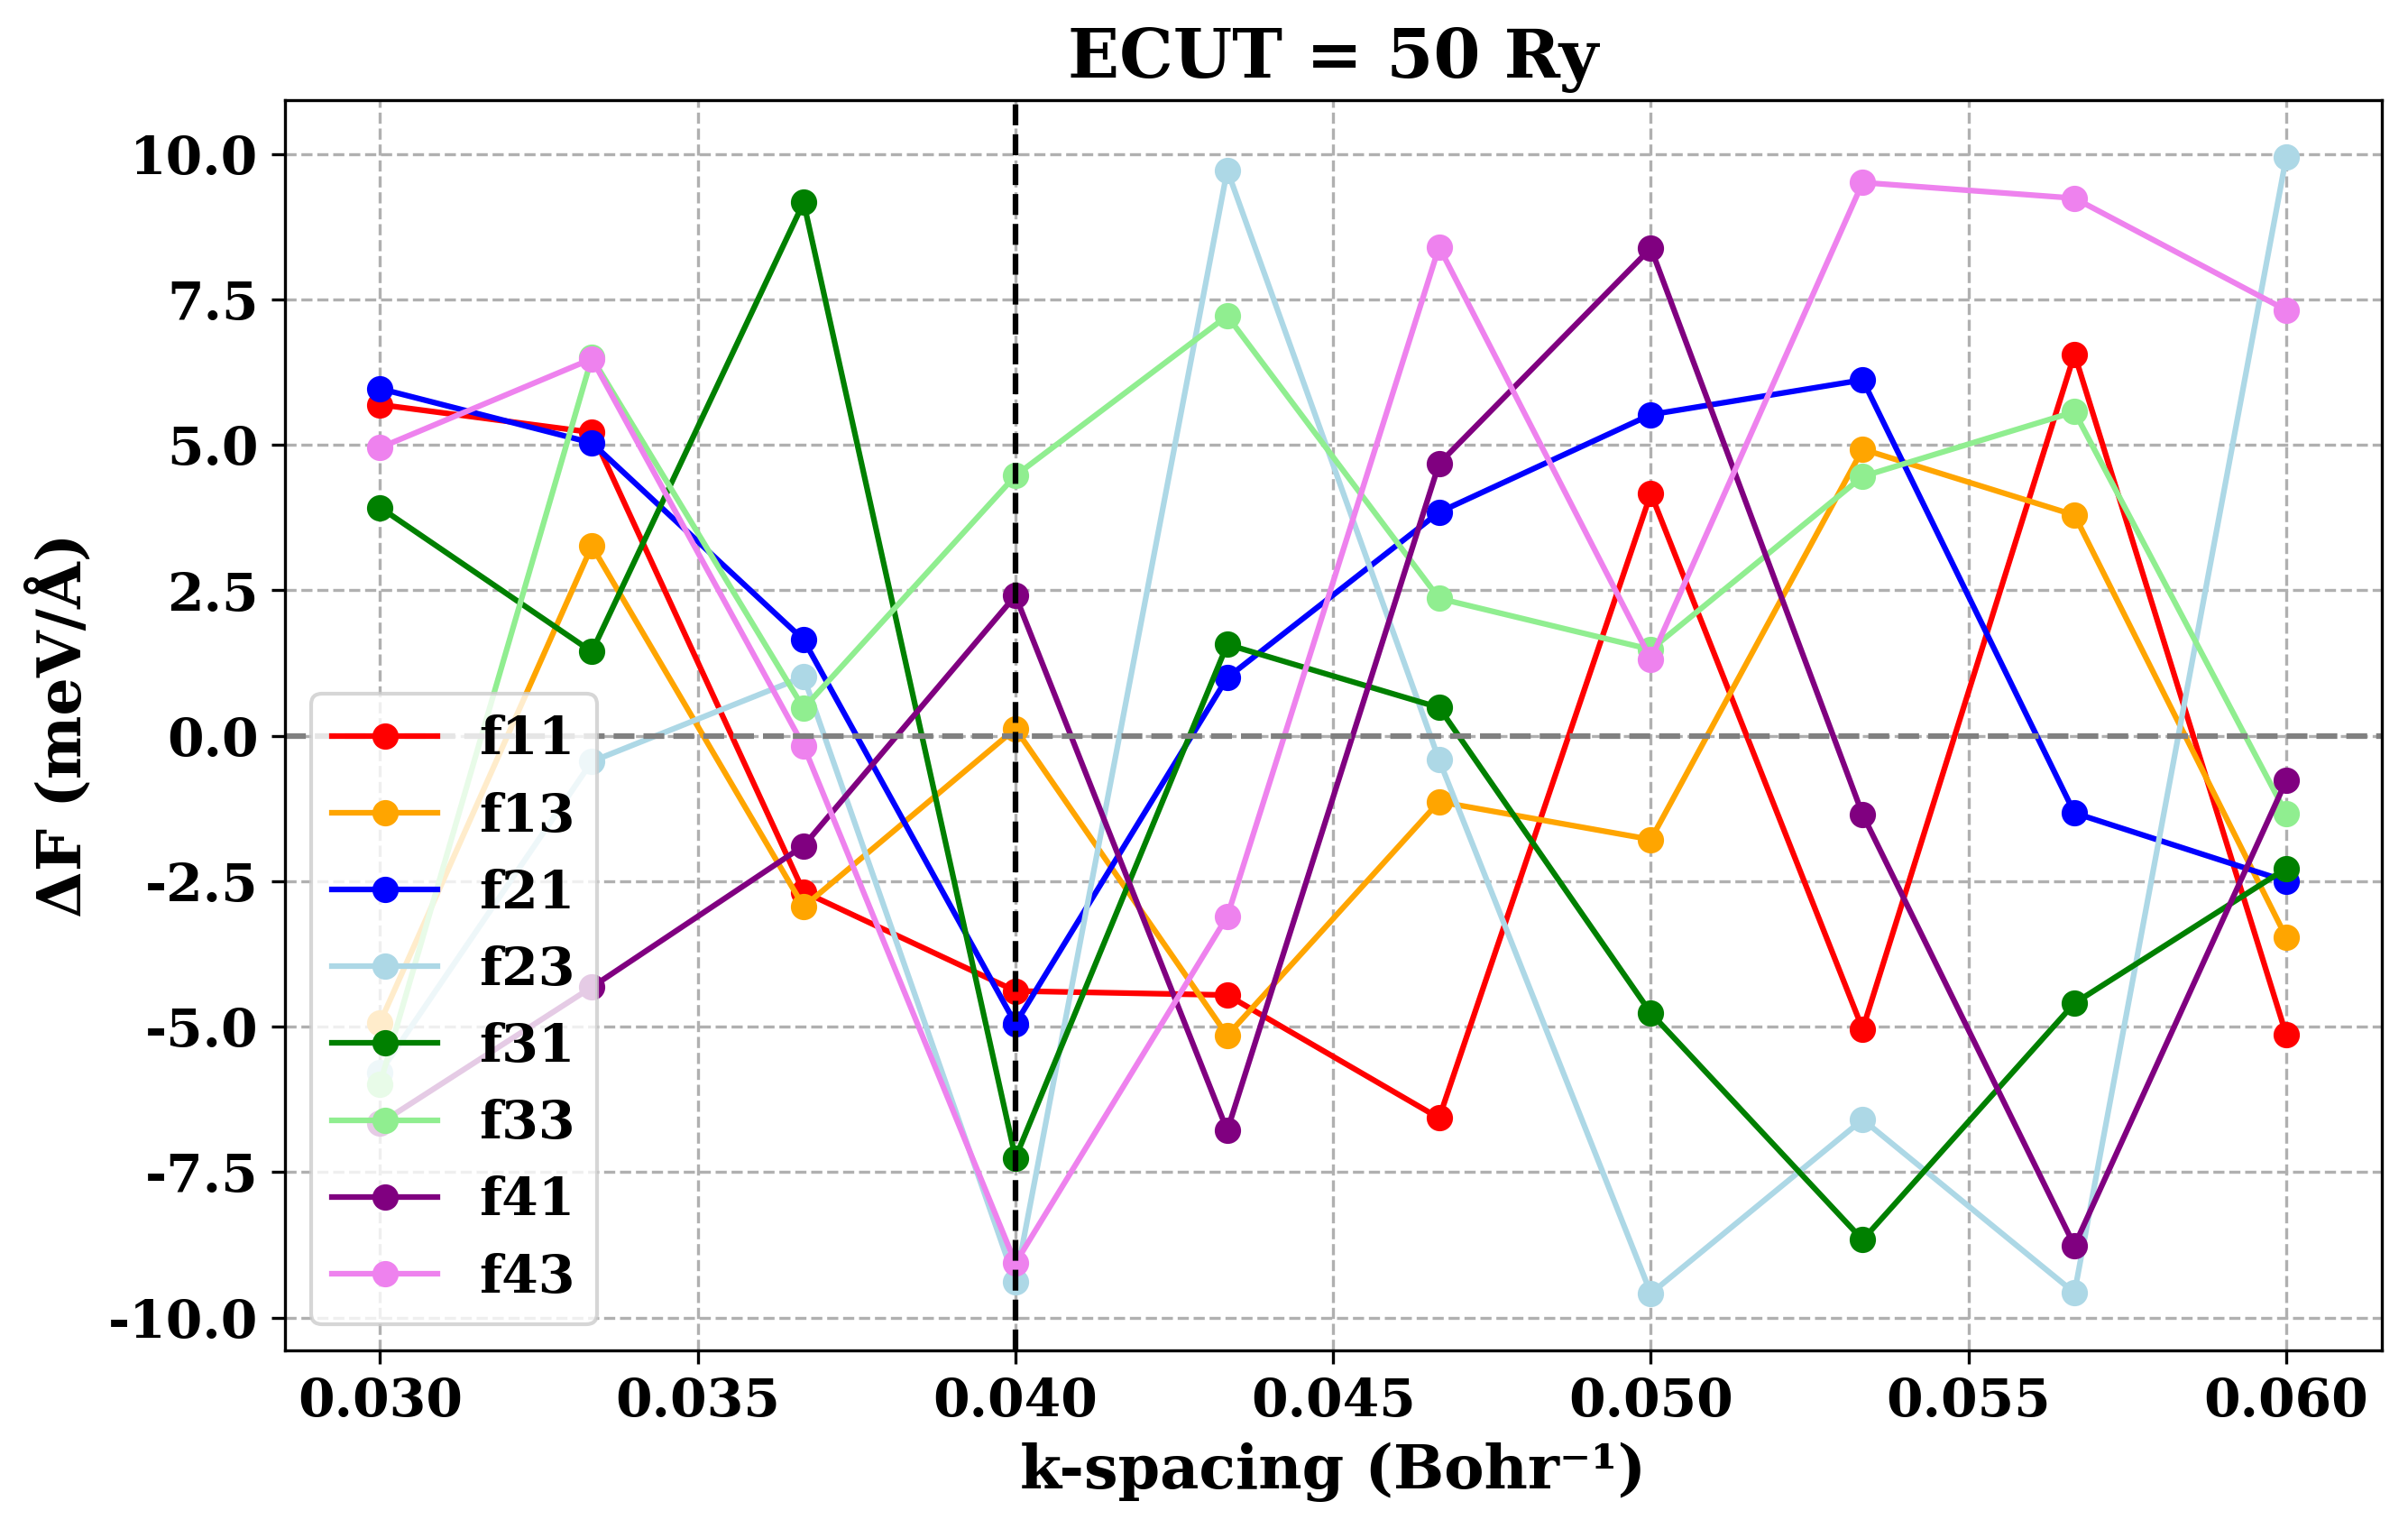

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

# Set font to DejaVu Serif for all text elements, bold, and larger size
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['DejaVu Serif']
rcParams['axes.unicode_minus'] = False
rcParams['font.weight'] = 'bold'
rcParams['font.size'] = 14  # Set the font size larger

# Simulate some data
k_spacing = np.linspace(0.03, 0.06, 10)
f11 = np.random.uniform(-10, 10, len(k_spacing))
f13 = np.random.uniform(-10, 10, len(k_spacing))
f21 = np.random.uniform(-10, 10, len(k_spacing))
f23 = np.random.uniform(-10, 10, len(k_spacing))
f31 = np.random.uniform(-10, 10, len(k_spacing))
f33 = np.random.uniform(-10, 10, len(k_spacing))
f41 = np.random.uniform(-10, 10, len(k_spacing))
f43 = np.random.uniform(-10, 10, len(k_spacing))

# Create the plot with higher resolution
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)

ax.plot(k_spacing, f11, 'o-', label='f11', color='red')
ax.plot(k_spacing, f13, 'o-', label='f13', color='orange')
ax.plot(k_spacing, f21, 'o-', label='f21', color='blue')
ax.plot(k_spacing, f23, 'o-', label='f23', color='lightblue')
ax.plot(k_spacing, f31, 'o-', label='f31', color='green')
ax.plot(k_spacing, f33, 'o-', label='f33', color='lightgreen')
ax.plot(k_spacing, f41, 'o-', label='f41', color='purple')
ax.plot(k_spacing, f43, 'o-', label='f43', color='violet')

ax.axhline(0, color='grey', linestyle='--')
ax.axvline(0.04, color='black', linestyle='--')

ax.set_xlabel('k-spacing (Bohr⁻¹)', fontweight='bold', fontsize=16)
ax.set_ylabel('ΔF (meV/Å)', fontweight='bold', fontsize=16)
ax.set_title('ECUT = 50 Ry', fontweight='bold', fontsize=18)

ax.legend()
ax.grid(True, linestyle='--')

plt.show()
